# MTH4000 Programming in Python I - Lab 7
Dr Matthew Lewis and Prof. Thomas Prellberg

## Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

### Exercise 1: Arc Diagrams

In the lecture we learned about legal arrangements of pairs of parentheses. There is a lovely visual interpretation using arc diagrams.

In a given arrangement, we can interpret any open bracket as the start of an arc, and any closed bracket as the end of an arc. If there are $n$ brackets, this corresponds to $n$ arcs. Labelling the arcs, we can transform

    ((())())
    
to

    01221330
    
indicating that there is an arc connecting equal numbers. The following function draws such an arc diagram.

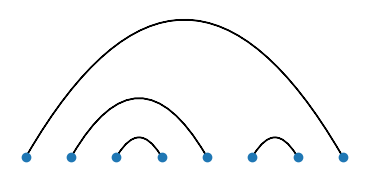

In [2]:
def draw_arc_diagram(l):
    """draws n arcs encoded as a list of 2n entries"""
    plt.figure(figsize=(4.5,2)) # pick appropriate figure size
    plt.plot([0 for _ in l],"o") # draw 2n points
    for i in range(len(l)//2):
        arc=[j for j, k in enumerate(l) if k==i] # get starting and end point of each arc
        plt.gca().add_patch(patches.FancyArrowPatch((arc[0],0),(arc[1],0),connectionstyle="angle3,angleA=60,angleB=-60")) # connect these by an arc
    plt.gca().axis("off") # remove the axis
    plt.show()
    
draw_arc_diagram([0,1,2,2,1,3,3,0])

The task you will have is to change the parenthesis arrangement to the labelled arcs representation. So how do we get from ((())()) to 01221330? In the lecture we had simplified this already by considering the positions of the brackets:
```python
def closed_list(open_list):
    return [i for i in range(2*len(open_list)) if i not in open_list]
```
and computing legality via
```python
def is_legal_list(c):
    return all(i<j for i,j in zip(c,closed_list(c)))
```

So instead of considering ((())()), we had started looking at the positions of the open brackets [0,1,2,5] (and, correspondingly, the positions of the closed brackets [3,4,6,7]). This means that the corresponding arc labelling is 012\*\*3\*\*, and we need to figure out how to associate labels to the individual asterisks \*.

#### Exercise 1.1.: Convert the position of the open brackets to the corresponding arcs.

The key observation is that the the first closed bracket needs to be connected by an arc to the immediately preceding open bracket. (Otherwise, there would necessarily be a crossing of arcs!) Equivalently, the last open bracket needs to be connected by an arc to the immediately succeeding closed bracket. This can be done iteratively by drawing arcs and considering the remaining available brackets.

In our example, 012\*\*3\*\* would successively become filled with 012\*\*33\*, 0122\*33\*, 0122133\*, and finally 01221330.



The algorithm is therefore the following:

0. Given the positions of n open brackets, create an list of length 2n filled with * denoting undetermined arc labels
1. For all open brackets, label the i'th open bracket with arc label i.
2. If there are no unmatched open brackets, return the arc labelling
3. Otherwise, for the last unmatched open bracket, find the first succeeding unmatched closed bracket and label it with the same arc label.
4. Repeat from step 2.

Using this algorithm, write a function `arc_representation()` that takes a list of open bracket positions and returns an arc representation.

We are starting you off with a function that already contains steps 0 and 1, you only have to do the loop given by steps 2, 3, and 4:

```python
def arc_representation(c):
    n=len(c)
    arc=["*"]*2*n
    for i in range(n):
        pos=c[i]
        arc[pos]=i
# fill in the missing code




# fill in the missing code
    return arc
```

In [ ]:
# test this
arc_representation([0,1,2,5])

#### Exercise 1.2: draw your results

Produce images for all fourteen arc diagrams with four arcs.

*Hint: look at the lecture notes on how to find all such arc diagrams: use `itertools`, `closed_list`, and check with `is_legal_list`*

### Exercise 2: Arc Diagrams with Crossings

If you did the above correctly, all your arcs should be nested, i.e. there should not be any crossing. However, if you have made a mistake somewhere in your code, you might have found something like this:

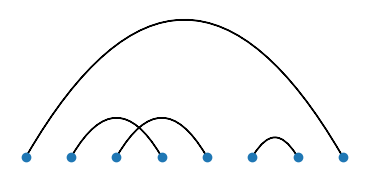

In [3]:
draw_arc_diagram([0,1,2,1,2,3,3,0])

There is now one crossing, even though the underlying order of brackets is the same as for:

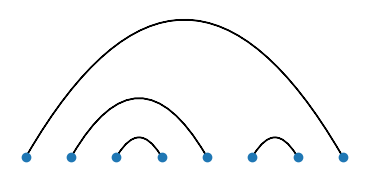

In [4]:
draw_arc_diagram([0,1,2,2,1,3,3,0])

In both cases we have ((())()), it's just that the connection has been done differently. It is clear that, given a legal arrangement of brackets, there are many ways of connecting these brackets with arcs such that open and closed brackets correspond to starting and ending of arcs. 

A bit of thinking should convince you that for ()() there is only one possible arc diagram 0011, whereas for (()) there are two, namely 0101 and 0110.

But just how many are there in general? This exercise will ask you to develop Python code to explore this further.

#### Exercise 2.1: Write a function that counts the number of possible arc diagrams for a given legal arrangement of brackets.

We again have to come up with an algorithm for how to do this. Let's see what can go wrong. For (()) we need to start arcs at positions 0 and 1 and end them at positions 2 and 3, and we can choose either one for each arc.

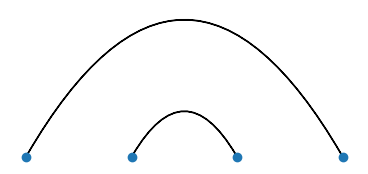

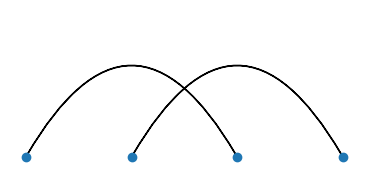

In [5]:
draw_arc_diagram([0,1,1,0])
draw_arc_diagram([0,1,0,1])

For ()() we need to start arcs at positions 0 and 2 and end them at positions 1 and 3. But now there is only one way to choose these.

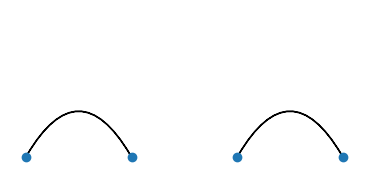

In [6]:
draw_arc_diagram([0,0,1,1])

If instead we choose to connect position 0 with 3, then we would be forced to connect position 2 with 1, but this changes the "direction" of the arc. Consequently the two inner brackets get swapped and instead of ()() this arc diagram belongs to (()).

So how do we start? For a legal arrangement, the first bracket is necessarily an open bracket, and any closed bracket can be used to form an arc with the first bracket. We can "remove" these brackets and get a shorter arrangement. 

Now three cases can occur:
- the shorter arrangement is empty: we are done!
- the shorter arrangement starts with a closed bracket: we cannot finish this. Stop here.
- the shorter arrangement starts with an open bracket: we are fine, and can continue with the shorter arrangement.

This looks like we need a counter variable, a for loop, and a recursive function call. I shall leave the details to you.

Write a function `count_arc_diagrams()` that takes a legal arrangement of brackets and counts the total number of possible arc diagrams.

For the argument `"((())())"` this function should return the number 12.

In [ ]:
# testing this: you should find 12 different diagrams
count_arc_diagrams("((())())")

Can you find them all by hand? This becomes quite tedious.

#### Exercise 2.2: (Advanced) Draw all possible arc diagrams for a given legal arrangement of brackets

Now that we have counted all arc diagrams, how can we draw them? The above function only produced numbers and did not keep track of already selected arcs.

So instead of shortening the arrangements, replace brackets by the arc labels.

A recursive approach is now less helpful. Assume we have a legal arrangement of $2n$ brackets. We need the positions of all $n$ open brackets and all $n$ closed brackets. 

Labelling the $n$ open brackets with $0$ to $n-1$, we now have to match them with $n$ closed brackets. There are $n!$ possibilities to label the closed brackets, so let's just go through all of them - there may be more efficient ways, but we will choose simplicity. We will use `permutations` from itertools to go through all possible permutations.

For example, for ()() we have open brackets at positions 0 and 1, and closed brackets at positions 2 and 3, so `pos_open` is `[0,2]` and `pos_closed` is `[1,3]`. Permuting the entries in `pos_closed` gives `p=[1,3]` and `p=[3,1]`. For arcs to be allowed, we need `pos_open[i]<p[i]` for all indices. Choosing `p=[1,3]` we find $0<1$ and $2<3$, which is valid. However, choosing `p=[3,1]` we find $0<3$ and $2<1$, which is invalid. 


Write a function `arc_diagrams_for_arrangement()` that takes a list of open bracket positions and returns a list of all arc diagrams that can be created from this.

Now that this function is written, it is easy to draw the output and hence check visually that everything makes sense.

In [ ]:
all_diagrams=arc_diagrams_for_arrangement([0,1,2,5])
for diagram in all_diagrams:
    draw_arc_diagram(diagram)

### Exercise 3:

To finish, we change tack and ask you to compute roots of functions with the Bisection Algorithm, using `bisection()` as given in the lecture notes.

For this, you need to figure out which parameters `a`, `b`, and `N` to use when calling the function `bisection(f,a,b,N)`.


#### Exercise 3.0.: Copy the function `bisection()` from the lecture notes.

#### Exercise 3.1.: Find $x\in(0,\pi)$ for which $\cos(x)=x$, with an accuracy of $10^{-8}$. 

#### Exercise 3.2.: Find all real roots of $x^3-5x+1=0$ with an accuracy of $10^{-12}$.

This is a degree three polynomial, so we can use

#### Exercise 3.3.: Find all real roots of $-x^5/100+x^3-5x+1=0$ with an accuracy of $10^{-12}$.

## Submit your Jupyter Notebook to QMPLUS

Once you are done, save the jupyter notebook and submit it to QMPLUS under Lab Report Week 8.